In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [3]:
train_df.shape

(10407, 4)

In [6]:
train_df.label.unique()

array(['bacterial_leaf_blight', 'bacterial_leaf_streak',
       'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart',
       'downy_mildew', 'hispa', 'normal', 'tungro'], dtype=object)

In [9]:
print(f'The total number of classes are {len(train_df.label.unique())}')

The total number of classes are 10


In [10]:
train_df.label.value_counts()

normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: label, dtype: int64

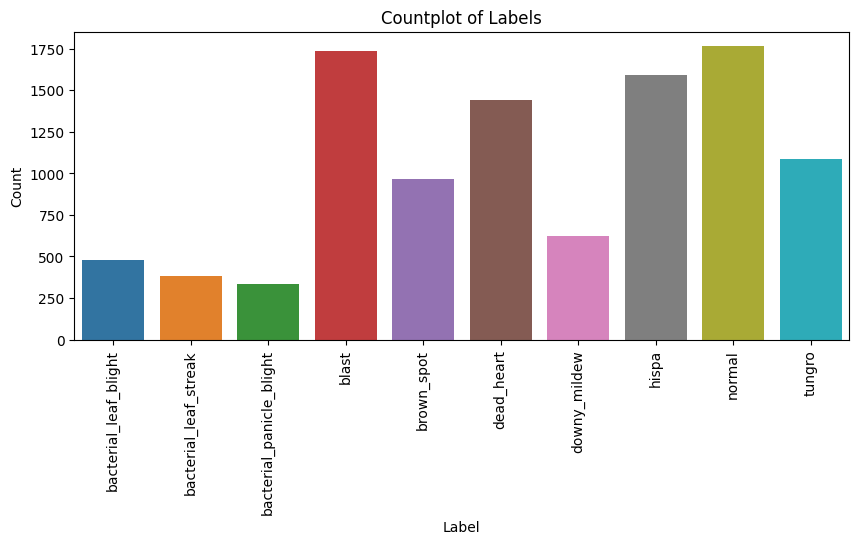

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(10,4))
sns.countplot(data=train_df, x='label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Countplot of Labels')
plt.show()

In [19]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from keras.layers.core import Dense
from keras.layers.core import Flatten
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
import numpy as np
from PIL import Image

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [50]:
import os

def PrintImageCount(main_dir):
  directory = os.listdir(main_dir)
  for i in range(0,len(directory)):
    print()
    
    new_path = os.path.join(main_dir, directory[i])
    sub_dir = os.listdir(new_path)
    print(directory[i] + "\n\tTotal Images: ", len(sub_dir))

In [30]:
# !unzip '/content/gdrive/MyDrive/VentureDive/Test Material-20230504T121415Z-001.zip'
# !unzip '/content/Test Material/Problem 4.zip'

In [51]:
PrintImageCount('/content/train_images')


hispa
	Total Images:  1594

bacterial_leaf_blight
	Total Images:  479

brown_spot
	Total Images:  965

bacterial_panicle_blight
	Total Images:  337

downy_mildew
	Total Images:  620

tungro
	Total Images:  1088

blast
	Total Images:  1738

bacterial_leaf_streak
	Total Images:  380

normal
	Total Images:  1764

dead_heart
	Total Images:  1442


In [100]:
img_height, img_width = 256, 256
batch_size = 32

In [57]:
#Augmentation Function

from keras.preprocessing.image import ImageDataGenerator
from skimage import io
import numpy as np
import os
from PIL import Image
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array

def AugmentImages(Path):
  datagen = ImageDataGenerator(        
              width_shift_range=0.1,  
              height_shift_range=0.1,    
              brightness_range = (0.3, 0.9),
              zoom_range=0.2)

  classes = os.listdir(Path)
  for i in range(0,10):
    index = i 

    class_ = classes[i]
    image_directory = Path + '/' + class_ + '/'
    # SIZE = 128
    dataset = []

    print(image_directory)
    my_images = os.listdir(image_directory)
    for i, image_name in enumerate(my_images):    
      if ((image_name.split('.')[1] == 'jpg')):
          image = load_img(image_directory + image_name, target_size = (img_height, img_width))
          image = img_to_array(image)
          dataset.append(image)

    x = np.array(dataset)
    i = 0
    for batch in datagen.flow(x, batch_size=batch_size,
                              save_to_dir= Path  + '/' + class_ + '/',
                              save_prefix='aug',
                              save_format='jpg'):    
      i += 1    
      if i > 5:        
        break

In [58]:
AugmentImages("/content/train_images")

/content/train_images/hispa/
/content/train_images/bacterial_leaf_blight/
/content/train_images/brown_spot/
/content/train_images/bacterial_panicle_blight/
/content/train_images/downy_mildew/
/content/train_images/tungro/
/content/train_images/blast/
/content/train_images/bacterial_leaf_streak/
/content/train_images/normal/
/content/train_images/dead_heart/


In [59]:
PrintImageCount('/content/train_images')


hispa
	Total Images:  1978

bacterial_leaf_blight
	Total Images:  863

brown_spot
	Total Images:  1349

bacterial_panicle_blight
	Total Images:  674

downy_mildew
	Total Images:  1004

tungro
	Total Images:  1472

blast
	Total Images:  2122

bacterial_leaf_streak
	Total Images:  760

normal
	Total Images:  2148

dead_heart
	Total Images:  1826


In [77]:
import os
import random
import shutil

train_dataset_url = "/content/train_images"
validation_folder = "/content/validation_images"

# Create the validation folder if it doesn't exist
if not os.path.exists(validation_folder):
    os.makedirs(validation_folder)

# Get the list of folders in the train_dataset_url directory
folders = os.listdir(train_dataset_url)

for folder in folders:
    folder_path = os.path.join(train_dataset_url, folder)
    validation_folder_path = os.path.join(validation_folder, folder)

    # Create the validation folder for each class if it doesn't exist
    if not os.path.exists(validation_folder_path):
        os.makedirs(validation_folder_path)

    # Get the list of images in the folder
    images = os.listdir(folder_path)
    
    # Calculate the number of images to move
    num_images_to_move = int(0.2 * len(images))  # 20% of the images
    
    # Randomly select the images to move
    images_to_move = random.sample(images, num_images_to_move)
    
    for image in images_to_move:
        # Move the image from train_dataset_url to validation_folder_path
        image_path = os.path.join(folder_path, image)
        new_image_path = os.path.join(validation_folder_path, image)
        shutil.move(image_path, new_image_path)


In [78]:
PrintImageCount('/content/validation_images')


hispa
	Total Images:  395

bacterial_leaf_blight
	Total Images:  172

brown_spot
	Total Images:  269

bacterial_panicle_blight
	Total Images:  134

downy_mildew
	Total Images:  200

tungro
	Total Images:  294

blast
	Total Images:  424

bacterial_leaf_streak
	Total Images:  152

normal
	Total Images:  429

dead_heart
	Total Images:  365


In [79]:
import pathlib

train_dataset_url = "/content/train_images"
train_data_dir = pathlib.Path(train_dataset_url)

validation_dataset_url = "/content/validation_images"
validation_data_dir = pathlib.Path(validation_dataset_url)

In [101]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11362 files belonging to 10 classes.


In [102]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  validation_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2834 files belonging to 10 classes.


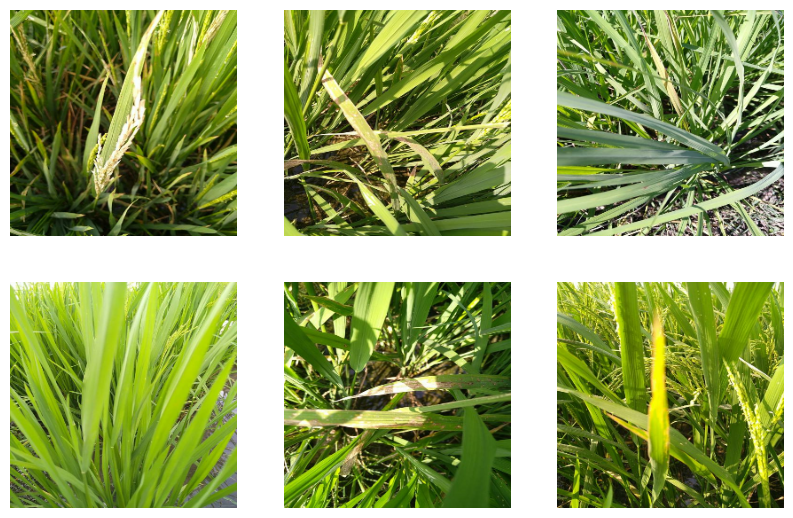

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [111]:
#changing the model here
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [112]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 128, 128, 32)      0         
                                                                 
 conv2d_31 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 64, 64, 64)       

In [114]:
model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit_generator(train_ds, validation_data=val_ds, epochs=50)

Epoch 1/50


<ipython-input-114-85a7b9783873>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_ds, validation_data=val_ds, epochs=50)


356/356 [==============================] - 53s 139ms/step - loss: 1.4544 - accuracy: 0.5075 - val_loss: 1.4129 - val_accuracy: 0.5642
Epoch 2/50
356/356 [==============================] - 51s 141ms/step - loss: 1.2266 - accuracy: 0.5880 - val_loss: 1.1196 - val_accuracy: 0.6546
Epoch 3/50
356/356 [==============================] - 49s 136ms/step - loss: 1.0255 - accuracy: 0.6609 - val_loss: 0.9507 - val_accuracy: 0.7057
Epoch 4/50
356/356 [==============================] - 51s 141ms/step - loss: 0.8747 - accuracy: 0.7114 - val_loss: 0.9852 - val_accuracy: 0.7092
Epoch 5/50
356/356 [==============================] - 49s 135ms/step - loss: 0.7672 - accuracy: 0.7493 - val_loss: 0.8634 - val_accuracy: 0.7435
Epoch 6/50
356/356 [==============================] - 50s 139ms/step - loss: 0.6530 - accuracy: 0.7850 - val_loss: 0.7873 - val_accuracy: 0.7579
Epoch 7/50
356/356 [==============================] - 48s 134ms/step - loss: 0.5891 - accuracy: 0.8065 - val_loss: 0.7040 - val_accuracy: 0.7

In [115]:
model.save("CNN_Weights")

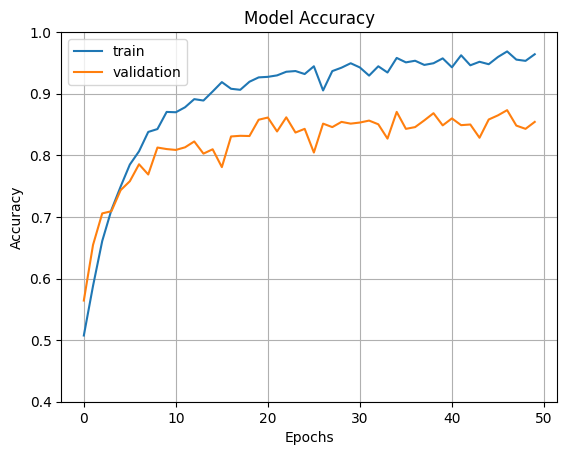

In [116]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [118]:
class_labels = list(train_df.label.unique())
class_labels

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [123]:
test_dir = '/content/test_images'

test_images = os.listdir(test_dir)
test_images.sort()

detections = []

for image in test_images:
  image_path = os.path.join(test_dir, image)
  print(image_path)
  image = cv2.imread(image_path)
  image_resized= cv2.resize(image, (img_height,img_width))
  image=np.expand_dims(image_resized,axis=0)

  pred=model.predict(image)
  output_class=np.argmax(pred)
  detections.append(class_labels[output_class])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 33ms/step
/content/test_images/200971.jpg
1/1 [==============================] - 0s 37ms/step
/content/test_images/200972.jpg
1/1 [==============================] - 0s 27ms/step
/content/test_images/200973.jpg
1/1 [==============================] - 0s 28ms/step
/content/test_images/200974.jpg
1/1 [==============================] - 0s 34ms/step
/content/test_images/200975.jpg
1/1 [==============================] - 0s 26ms/step
/content/test_images/200976.jpg
1/1 [==============================] - 0s 27ms/step
/content/test_images/200977.jpg
1/1 [==============================] - 0s 27ms/step
/content/test_images/200978.jpg
1/1 [==============================] - 0s 36ms/step
/content/test_images/200979.jpg
1/1 [==============================] - 0s 36ms/step
/content/test_images/200980.jpg
1/1 [==============================] - 0s 29ms/step
/content/test_images/200981.jpg
1/1 [====================

In [127]:
len(detections)

3469

In [130]:
submit_df = pd.read_csv("/content/sample_submission.csv")
submit_df.label = detections

submit_df.head()

,image_id,label
0,200001.jpg,brown_spot
1,200002.jpg,brown_spot
2,200003.jpg,downy_mildew
3,200004.jpg,blast
4,200005.jpg,blast


In [131]:
submit_df.to_csv("final_results.csv")

In [132]:
!zip -r /content/CNN_Weights.zip CNN_Weights

  adding: CNN_Weights/ (stored 0%)
  adding: CNN_Weights/saved_model.pb (deflated 89%)
  adding: CNN_Weights/variables/ (stored 0%)
  adding: CNN_Weights/variables/variables.data-00000-of-00001 (deflated 27%)
  adding: CNN_Weights/variables/variables.index (deflated 66%)
  adding: CNN_Weights/keras_metadata.pb (deflated 93%)
  adding: CNN_Weights/assets/ (stored 0%)
  adding: CNN_Weights/fingerprint.pb (stored 0%)
